Epoch 1/20


C:\Users\Saurabh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6583 - loss: 0.6101 - val_accuracy: 0.8297 - val_loss: 0.3833
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8247 - loss: 0.3945 - val_accuracy: 0.8605 - val_loss: 0.3164
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8496 - loss: 0.3379 - val_accuracy: 0.8679 - val_loss: 0.2986
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8546 - loss: 0.3247 - val_accuracy: 0.8753 - val_loss: 0.2827
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8667 - loss: 0.3002 - val_accuracy: 0.8769 - val_loss: 0.2726
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8730 - loss: 0.2883 - val_accuracy: 0.8827 - val_loss: 0.2728
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.8761 - loss: 0.2799 - val_accuracy: 0.8814 - val_loss: 0.2640
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8784 - loss: 0.2708 - val_accuracy

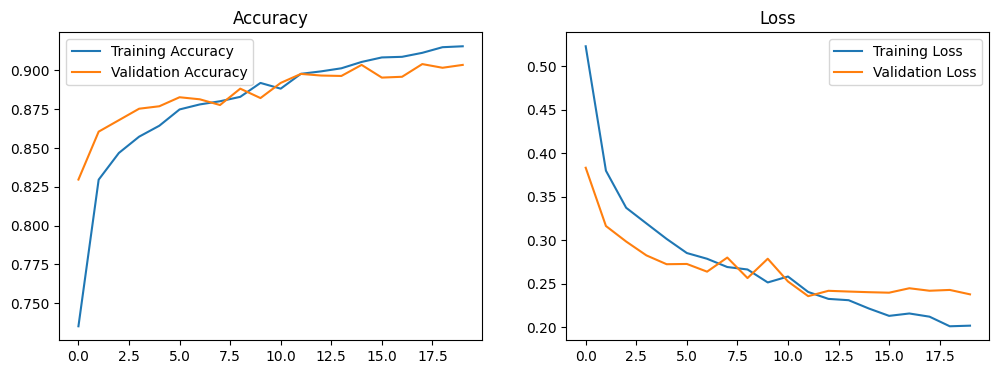

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Gender: Male


In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset
def load_dataset(csv_path):
    """
    Load dataset from a CSV file.
    
    Args:
        csv_path: Path to the CSV file.
    
    Returns:
        images: Array of images.
        labels: Corresponding labels (age, gender, ethnicity).
    """
    data = pd.read_csv(csv_path)
    
    # Extracting image pixels (assumed to be in a column named 'pixels') and converting to numpy array
    images = np.array([np.fromstring(pixels, sep=' ').reshape(48, 48) for pixels in data['pixels']])
    
    # Normalizing image data
    images = images / 255.0
    
    # Extracting labels
    age_labels = np.array(data['age'])
    gender_labels = np.array(data['gender'])  # Assuming binary gender (0: Male, 1: Female)
    ethnicity_labels = np.array(data['ethnicity'])
    
    return images, age_labels, gender_labels, ethnicity_labels

# Specify CSV path
csv_path = r"C:\Users\Saurabh Verma\ethinicity\age_gender.csv"

# Load and preprocess the data
images, age_labels, gender_labels, ethnicity_labels = load_dataset(csv_path)

# Reshape images to add channel dimension
images = images.reshape(-1, 48, 48, 1)

# Convert gender labels to categorical for binary classification
gender_labels = to_categorical(gender_labels, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, gender_labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes for gender classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Predict on unseen images
def predict_image(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48)) / 255.0
    img = img.reshape(1, 48, 48, 1)  # Add batch and channel dimensions
    prediction = model.predict(img)
    gender = 'Male' if np.argmax(prediction) == 0 else 'Female'
    return gender

# Example usage of prediction
image_path = r"C:\Users\Saurabh Verma\IMG_20220126_165928_465.jpg"  # Replace with the path to your unseen image
predicted_gender = predict_image(image_path, model)
print(f"Predicted Gender: {predicted_gender}")